# **📘 Lecture 17: Fetching Data from an API (For Machine Learning Projects)**

# **🎯 Why is This Important in Machine Learning?**


APIs are like bridges to get live, fresh data from websites, apps, or servers.


Instead of downloading a file manually, you fetch data automatically.


Many ML projects use real-time data from APIs (e.g., weather, stock prices, sports scores).

# **🔹 Part 1: What is an API?**

**API = Application Programming Interface**

# In simple words:

A way to talk to another server and get data.

# 👉 Example:

You open a food delivery app → it fetches restaurant data using APIs.

# **🔹 Part 2: How to Fetch Data From an API in Python?**

## **✅ You mainly need two libraries:**

requests (most popular for API calls)

json (to handle the data you get back)

id

title

release_date

overview

popularity

vote_average

vote_count

8851*7

#Example: 1

In [60]:
import pandas as pd
import requests

In [71]:
import requests # Make sure 'requests' is imported

# Assuming 'requests' was overwritten, re-import it to restore its functionality
import importlib
importlib.reload(requests)

# Now, you should be able to use 'requests.get'
response = requests.get("url api key")



In [74]:
response.json()

[{'symbol': 'AAPL',
  'name': 'Apple Inc.',
  'currency': 'USD',
  'exchangeFullName': 'NASDAQ Global Select',
  'exchange': 'NASDAQ'},
 {'symbol': 'AAPL.L',
  'name': 'LS 1x Apple Tracker ETC',
  'currency': 'GBp',
  'exchangeFullName': 'London Stock Exchange',
  'exchange': 'LSE'},
 {'symbol': 'AAPL.NE',
  'name': 'Apple Inc.',
  'currency': 'CAD',
  'exchangeFullName': 'CBOE CA',
  'exchange': 'NEO'},
 {'symbol': 'AAPL.MX',
  'name': 'Apple Inc.',
  'currency': 'MXN',
  'exchangeFullName': 'Mexico',
  'exchange': 'MEX'},
 {'symbol': 'AAPL.DE',
  'name': 'Apple Inc.',
  'currency': 'EUR',
  'exchangeFullName': 'Deutsche Börse',
  'exchange': 'XETRA'},
 {'symbol': 'AAPLUSTRAD.BO',
  'name': 'AA Plus Tradelink Limited',
  'currency': 'INR',
  'exchangeFullName': 'Bombay Stock Exchange',
  'exchange': 'BSE'},
 {'symbol': 'HARIAAPL.BO',
  'name': 'Haria Apparels Limited',
  'currency': 'INR',
  'exchangeFullName': 'Bombay Stock Exchange',
  'exchange': 'BSE'}]

In [77]:
for item in response.json():
   if 'results' in item:
       df = pd.DataFrame(item['results'])
       break

In [81]:
df = pd.DataFrame(response.json())

In [82]:
df.head()

,symbol,name,currency,exchangeFullName,exchange
0,AAPL,Apple Inc.,USD,NASDAQ Global Select,NASDAQ
1,AAPL.L,LS 1x Apple Tracker ETC,GBp,London Stock Exchange,LSE
2,AAPL.NE,Apple Inc.,CAD,CBOE CA,NEO
3,AAPL.MX,Apple Inc.,MXN,Mexico,MEX
4,AAPL.DE,Apple Inc.,EUR,Deutsche Börse,XETRA


In [83]:
df.shape

(7, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   symbol            7 non-null      object
 1   name              7 non-null      object
 2   currency          7 non-null      object
 3   exchangeFullName  7 non-null      object
 4   exchange          7 non-null      object
dtypes: object(5)
memory usage: 412.0+ bytes


In [85]:
df.isnull().sum()

,0
symbol,0
name,0
currency,0
exchangeFullName,0
exchange,0


In [86]:
df.duplicated().sum()

np.int64(0)

In [87]:
df.describe()

,symbol,name,currency,exchangeFullName,exchange
count,7,7,7,7,7
unique,7,4,6,6,6
top,AAPL,Apple Inc.,INR,Bombay Stock Exchange,BSE
freq,1,4,2,2,2


In [56]:
# import requests

# # Step 1: API URL
# url = "https://api.agify.io?name=michael"

# # Step 2: Send Request
# response = requests.get(url)

# # Step 3: Check if successful
# if response.status_code == 200:
#     data = response.json()  # Convert to Python dictionary
#     print(data)
# else:
#     print("Error:", response.status_code)


# ✅ Meaning:

For name "michael", predicted average age is 69, from 134,915 people data

# **🔹 Part 3: Breaking It Down - Important Steps**

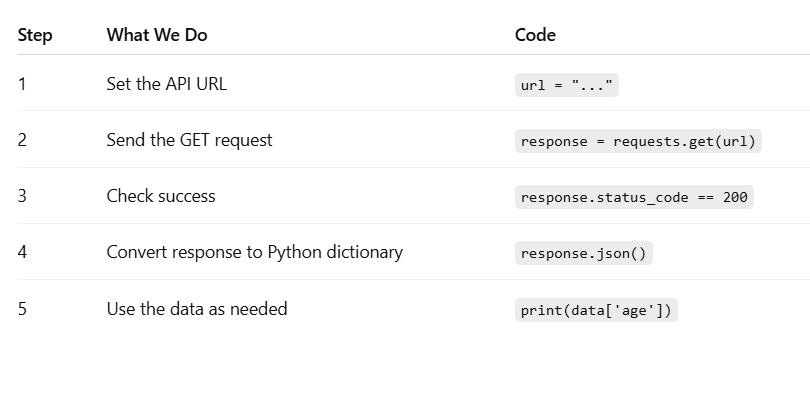

# Example: 2

In [88]:
import requests # Make sure 'requests' is imported

# Assuming 'requests' was overwritten, re-import it to restore its functionality
import importlib
importlib.reload(requests)

# Now, you should be able to use 'requests.get'
response = requests.get("url api key")

In [89]:
temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]

In [94]:
temp_df.head()

,id,title,overview,release_date,popularity,vote_average,vote_count
0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,62.9294,8.709,28195
1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,35.2183,8.687,21373
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,16.8829,8.571,12916
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,36.5596,8.564,16388
4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,15.6512,8.548,9093


In [95]:
df = pd.DataFrame()

In [96]:
df

""


In [99]:
for i in range(1, 429):
    response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page={}'.format(i))
    temp_df = pd.DataFrame(response.json()['results'])[['id', 'title', 'overview', 'release_date', 'popularity', 'vote_average', 'vote_count']]
    # Use pd.concat instead of df.append
    df = pd.concat([df, temp_df], ignore_index=True)

In [100]:
df.shape

(8560, 7)

In [101]:
df.to_csv('movies.csv')